---
<img src = '../../../logo_dh_grupo3.png'>

# <h1><left><ins>Data Wrangling y Visualización</ins></left></h1>

## Importación de librerías y bases de datos

In [1]:
# Importamos las librerias relevantes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importamos las bases de datos

data_0 = pd.read_csv("bank-additional-full_limpia.csv")

In [3]:
# Cantidad de filas y columnas

data_0.shape

(30360, 21)

La base de datos tiene 30,360 observaciones de 21 columnas.

In [4]:
# Nombre y tipo de columnas, ademas de cantidad de filas no nulas

data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30360 entries, 0 to 30359
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30360 non-null  int64  
 1   job             30360 non-null  object 
 2   marital         30360 non-null  object 
 3   education       30360 non-null  object 
 4   default         30360 non-null  object 
 5   housing         30360 non-null  object 
 6   loan            30360 non-null  object 
 7   contact         30360 non-null  object 
 8   month           30360 non-null  object 
 9   day_of_week     30360 non-null  object 
 10  duration        30360 non-null  int64  
 11  campaign        30360 non-null  int64  
 12  pdays           0 non-null      float64
 13  previous        30360 non-null  int64  
 14  poutcome        30360 non-null  object 
 15  emp.var.rate    30360 non-null  float64
 16  cons.price.idx  30360 non-null  float64
 17  cons.conf.idx   30360 non-null 

Hay 10 variables numéricas y 11 categóricas.

## Edición y Análisis

### Variable 'y' (target)

In [5]:
# Vamos a transformarla en variable categorica

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(data_0['y'])

data_0['y'] = le.transform(data_0['y'])

data_0['y'].value_counts()

0    28705
1     1655
Name: y, dtype: int64

In [6]:
# Vemos proporciones en cada categoria

data_0['y'].value_counts(normalize = True).round(2) * 100

0    95.0
1     5.0
Name: y, dtype: float64

Vemos que las clases están desbalanceadas.

### Variable 'age'

In [7]:
# Estadisticas descriptivas

data_0['age'].describe()

count    30360.000000
mean        39.671080
std          9.480333
min         18.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         69.000000
Name: age, dtype: float64

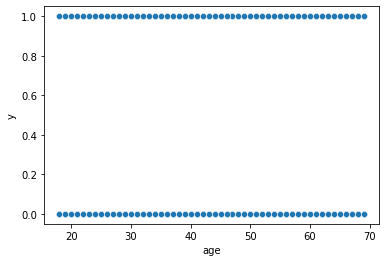

In [8]:
# Relacion con target

sns.scatterplot(x = data_0.age,
               y = data_0.y);

In [9]:
# Armamos categorias en funcion de quartiles

data_0['age_cat'] = pd.qcut(x = data_0['age'],
                           q = 3)

data_0['age_cat'].value_counts()

(17.999, 34.0]    10767
(34.0, 44.0]      10254
(44.0, 69.0]       9339
Name: age_cat, dtype: int64

In [10]:
#Transformamos en categorica y etiquetamos categorias

data_0['age_cat'] = data_0['age_cat'].astype('category')

data_0['age_cat'].cat.categories = ['18-34 años', '35-44 años', '45+ años']

In [11]:
data_0['age_cat'].value_counts(normalize = True).round(2) * 100

18-34 años    35.0
35-44 años    34.0
45+ años      31.0
Name: age_cat, dtype: float64

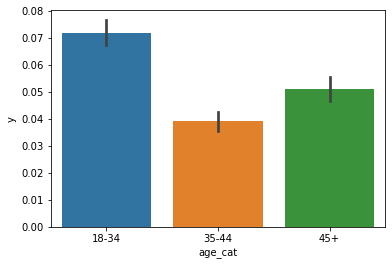

In [12]:
# Relacion con target

sns.barplot(x = data_0.age_cat,
               y = data_0.y)
plt.xticks(ticks = np.arange(3), 
           labels = ['18-34', '35-44', '45+']);

### Variable 'job'

In [13]:
# Estadisticas descriptivas

data_0['job'].value_counts(normalize = True).round(2) * 100

admin.           26.0
blue-collar      24.0
technician       17.0
services         10.0
management        7.0
entrepreneur      4.0
self-employed     3.0
retired           3.0
housemaid         3.0
unemployed        2.0
student           2.0
Name: job, dtype: float64

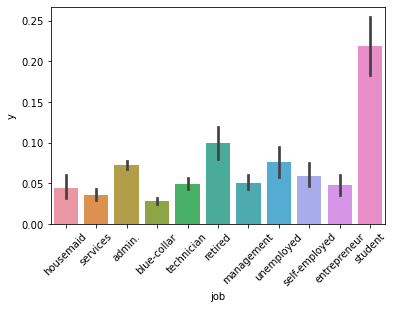

In [14]:
# Relacion con target

bar_plot = sns.barplot(x = data_0['job'],
                       y = data_0['y'])
plt.xticks(rotation = 45)
plt.show();

In [15]:
# Armamos categorias en funcion de hipotesis y analisis grafico

job_1 = ['student', 'unemployed', 'retired']

job_2 = ['housemaid', 'blue-collar', 'services']

job_3 = ['admin.', 'self-employed', 'entrepeneur', 'technician', 'management']

data_0['job_cat'] = data_0['job'].\
apply(lambda x: '1.not_working' if x in job_1 else '2.med-low skill job' if x in job_2 else '3.med-high skill job')

# Transformamos en categorica y etiquetamos categorias

data_0['job_cat'] = data_0['job_cat'].astype('category')

data_0['job_cat'].cat.categories = ['Inactivo/Desocupado', 'Calificación Media-Baja' ,'Calificación Media-Alta']

In [16]:
data_0['job'].value_counts(normalize = True).round(2) * 100

admin.           26.0
blue-collar      24.0
technician       17.0
services         10.0
management        7.0
entrepreneur      4.0
self-employed     3.0
retired           3.0
housemaid         3.0
unemployed        2.0
student           2.0
Name: job, dtype: float64

In [17]:
data_0['job_cat'].value_counts(normalize = True).round(2) * 100

Calificación Media-Alta    57.0
Calificación Media-Baja    36.0
Inactivo/Desocupado         7.0
Name: job_cat, dtype: float64

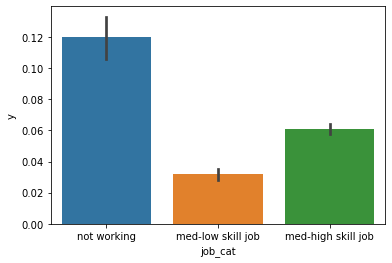

In [18]:
# Relacion con target

sns.barplot(x = data_0.job_cat,
               y = data_0.y)
plt.xticks(ticks = np.arange(3), 
           labels = ['not working', 'med-low skill job', 'med-high skill job'])
plt.show();

### Variable 'marital'

In [19]:
# Estadisticas descriptivas

data_0['marital'].value_counts(normalize = True).round(2) * 100

married     62.0
single      27.0
divorced    11.0
Name: marital, dtype: float64

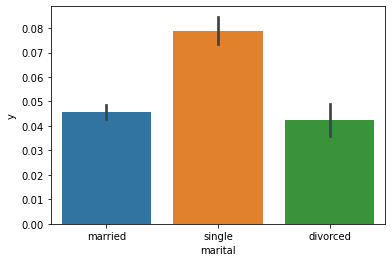

In [20]:
# Relacion con target

sns.barplot(x = data_0['marital'],
                       y = data_0['y']);

In [21]:
# Armamos categorias en funcion de hipotesis y analisis grafico

#consideramos 1 si esta o ha estado alguna vez casado y 0 si soltero

data_0['married'] = data_0['marital'].\
apply(lambda x: 0 if x == 'single' else 1)


In [22]:
data_0['marital'].value_counts(normalize = True).round(2) * 100

married     62.0
single      27.0
divorced    11.0
Name: marital, dtype: float64

In [23]:
data_0['married'].value_counts(normalize = True).round(2) * 100

1    73.0
0    27.0
Name: married, dtype: float64

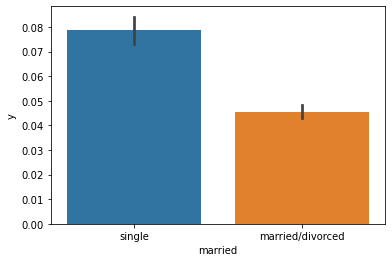

In [24]:
# Relacion con target

sns.barplot(x = data_0.married,
               y = data_0.y)
plt.xticks(ticks = np.arange(2), 
           labels = ['single', 'married/divorced'])
plt.show();

### Variable 'education'

In [25]:
# Estadisticas descriptivas

data_0['education'].value_counts(normalize = True).round(2) * 100

university.degree      33.0
high.school            23.0
basic.9y               15.0
professional.course    13.0
basic.4y               10.0
basic.6y                6.0
illiterate              0.0
Name: education, dtype: float64

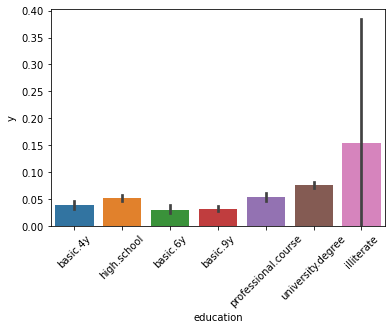

In [26]:
# Relacion con target

bar_plot = sns.barplot(x = data_0['education'],
                       y = data_0['y'])
plt.xticks(rotation = 45)
plt.show();

In [27]:
# Armamos categorias en funcion de hipotesis y analisis grafico

education_1 = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y']

education_2 = ['high.school', 'professional.course']

education_3 = ['university.degree']

data_0['edu_cat'] = data_0['education'].\
apply(lambda x: '1.incomplete_hs' if x in education_1 else '2.complete_hs' if x in education_2 else '3.complete_university')

#Transformamos en categorica y etiquetamos categorias

data_0['edu_cat'] = data_0['edu_cat'].astype('category')

data_0['edu_cat'].cat.categories = ['Secundario Inc', 'Secundario Com' ,'Universitario Com']

In [28]:
data_0['education'].value_counts(normalize = True).round(2) * 100

university.degree      33.0
high.school            23.0
basic.9y               15.0
professional.course    13.0
basic.4y               10.0
basic.6y                6.0
illiterate              0.0
Name: education, dtype: float64

In [29]:
data_0['edu_cat'].value_counts(normalize = True).round(2) * 100

Secundario Com       36.0
Universitario Com    33.0
Secundario Inc       31.0
Name: edu_cat, dtype: float64

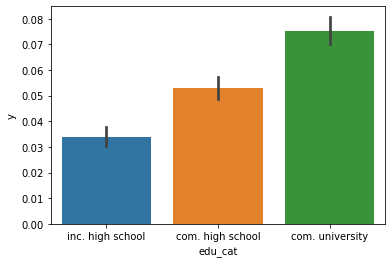

In [30]:
# Relacion con target

sns.barplot(x = data_0.edu_cat,
               y = data_0.y)
plt.xticks(ticks = np.arange(3), 
           labels = ['inc. high school', 'com. high school', 'com. university'])
plt.show();

### Variable 'default'

In [31]:
# Estadisticas descriptivas
data_0['default'].value_counts(normalize = True).round(2) * 100

no     100.0
yes      0.0
Name: default, dtype: float64

El desbalanceo de esta variable es tal que casi no constituye una variable sino un valor fijo.

### Variable 'housing'

In [32]:
# Estadisticas descriptivas
data_0['housing'].value_counts(normalize = True).round(2) * 100

yes    54.0
no     46.0
Name: housing, dtype: float64

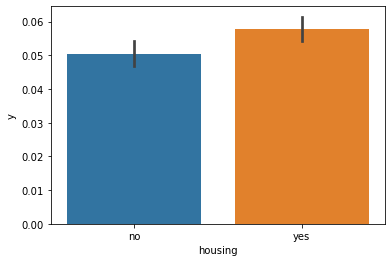

In [33]:
# Relacion con target
sns.barplot(x = data_0['housing'],
                       y = data_0['y']);

In [34]:
# Vamos a transformarla en variable categorica

le.fit(data_0['housing'])

data_0['housing'] = le.transform(data_0['housing'])

data_0['housing'].value_counts()

1    16534
0    13826
Name: housing, dtype: int64

In [35]:
# Vemos proporciones en cada categoria

data_0['housing'].value_counts(normalize = True).round(2) * 100

1    54.0
0    46.0
Name: housing, dtype: float64

### Variable 'loan'

In [36]:
# Estadisticas descriptivas
data_0['loan'].value_counts(normalize = True).round(2) * 100

no     85.0
yes    15.0
Name: loan, dtype: float64

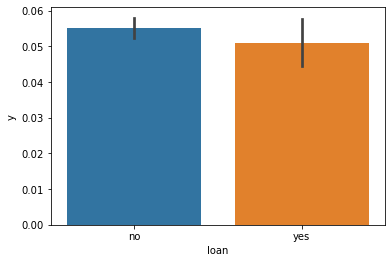

In [37]:
# Relacion con target
sns.barplot(x = data_0['loan'],
                       y = data_0['y']);

In [38]:
# Vamos a transformarla en variable categorica

le.fit(data_0['loan'])

data_0['loan'] = le.transform(data_0['loan'])

data_0['loan'].value_counts()

0    25761
1     4599
Name: loan, dtype: int64

In [39]:
# Vemos proporciones en cada categoria

data_0['loan'].value_counts(normalize = True).round(2) * 100

0    85.0
1    15.0
Name: loan, dtype: float64

### Variable 'contact'

In [40]:
# Estadisticas descriptivas
data_0['contact'].value_counts(normalize = True).round(2) * 100

cellular     59.0
telephone    41.0
Name: contact, dtype: float64

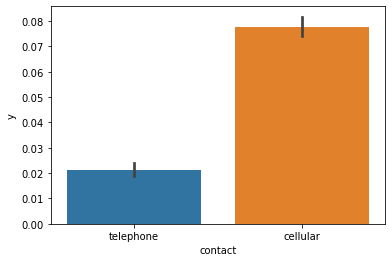

In [41]:
# Relacion con target
sns.barplot(x = data_0['contact'],
                       y = data_0['y']);

In [42]:
# Vamos a transformarla en variable categorica

le.fit(data_0['contact'])

data_0['contact'] = le.transform(data_0['contact'])

data_0['contact'].value_counts()

0    17821
1    12539
Name: contact, dtype: int64

In [43]:
# Vemos proporciones en cada categoria

data_0['contact'].value_counts(normalize = True).round(2) * 100

0    59.0
1    41.0
Name: contact, dtype: float64

### Variable 'month'

In [44]:
# Estadisticas descriptivas
data_0['month'].value_counts(normalize = True).round(2) * 100

may    34.0
jul    19.0
aug    16.0
jun    14.0
nov     9.0
apr     5.0
mar     1.0
sep     1.0
oct     0.0
dec     0.0
Name: month, dtype: float64

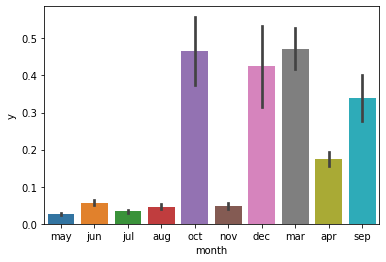

In [45]:
# Relacion con target
sns.barplot(x = data_0['month'],
                       y = data_0['y']);

In [46]:
# Armamos categorias en funcion de hipotesis y analisis grafico

# Creamos binaria donde mar-jun = 0, jul-dec = 1

dic_aux = {'mar': 0, 'apr': 0, 'may': 0, 'jun': 0, 'jul': 1, 
           'aug': 1, 'sep': 1, 'oct': 1, 'nov': 1, 'dec': 1}

data_0['month_cat'] = data_0.month.map(dic_aux)

In [47]:
data_0['month'].value_counts(normalize = True).round(2) * 100

may    34.0
jul    19.0
aug    16.0
jun    14.0
nov     9.0
apr     5.0
mar     1.0
sep     1.0
oct     0.0
dec     0.0
Name: month, dtype: float64

In [48]:
data_0['month_cat'].value_counts(normalize = True).round(2) * 100

0    54.0
1    46.0
Name: month_cat, dtype: float64

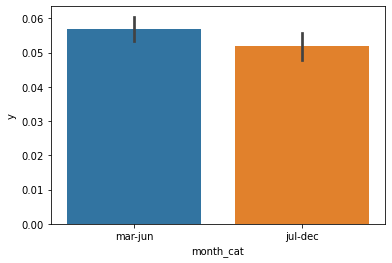

In [49]:
# Relacion con target
sns.barplot(x = data_0['month_cat'],
            y = data_0['y'])
plt.xticks(ticks = np.arange(2), 
           labels = ['mar-jun', 'jul-dec'])
plt.show();

In [50]:
# Asignamos numero de mes a la variable month

dic_aux = {'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 
           'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

data_0['month'] = data_0['month'].map(dic_aux)

In [51]:
# Vemos proporciones en cada categoria

data_0['month'].value_counts(normalize = True).round(2) * 100

5     34.0
7     19.0
8     16.0
6     14.0
11     9.0
4      5.0
3      1.0
9      1.0
10     0.0
12     0.0
Name: month, dtype: float64

### Variable 'day_of_week'

In [52]:
# Estadisticas descriptivas
data_0['day_of_week'].value_counts(normalize = True).round(2) * 100

mon    21.0
thu    20.0
tue    20.0
wed    20.0
fri    19.0
Name: day_of_week, dtype: float64

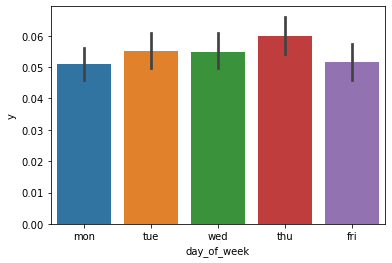

In [53]:
# Relacion con target
sns.barplot(x = data_0['day_of_week'],
                       y = data_0['y']);

In [54]:
# Vamos a transformarla en variable categorica

# Asignamos numero de dia a la variable day_of_week

dic_aux = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}

data_0['day_of_week'] = data_0['day_of_week'].map(dic_aux)

data_0['day_of_week'].value_counts(normalize = True).round(2) * 100

1    21.0
4    20.0
2    20.0
3    20.0
5    19.0
Name: day_of_week, dtype: float64

### Variable 'default'

In [55]:
data_0['duration'].value_counts()

73     140
111    139
85     139
114    138
124    137
      ... 
3        3
598      3
0        3
1        1
2        1
Name: duration, Length: 645, dtype: int64

In [56]:
# Relacion con target 
# Armamos categorias en funcion de quantiles

data_0['duration_cat'] = pd.qcut(x = data_0['duration'],
                           q = 10)

data_0['duration_cat'].value_counts(normalize = True).round(2)

(167.0, 203.0]    0.1
(60.0, 87.0]      0.1
(-0.001, 60.0]    0.1
(87.0, 112.0]     0.1
(314.0, 417.0]    0.1
(248.0, 314.0]    0.1
(112.0, 138.0]    0.1
(417.0, 644.0]    0.1
(138.0, 167.0]    0.1
(203.0, 248.0]    0.1
Name: duration_cat, dtype: float64

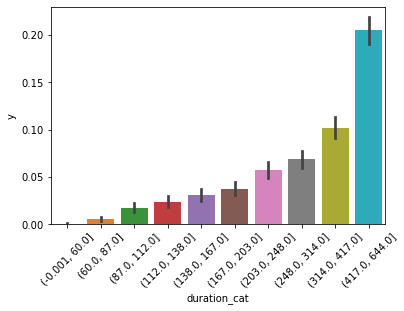

In [57]:
# Relacion con target
sns.barplot(x = data_0.duration_cat, y = data_0.y)
plt.xticks(rotation = 45)
plt.show()

Se observaque la duracion esta linealmente correlacionada con la variable target.

Por ejemplo: 
Si la llamada tiene una duracion 0 (o cercana a 0) es probable que no haga un deposito a plazo fijo. Mientras que en los casos en los que la llamada se extiende, es mas probable si realice el deposito a plazo fijo (podria pensarse que la llamada se extiende porque el cliente esta interesado en conocer los detalles del producto).

Por otra parte, la duracion de la llamada se conoce al terminar la conversacion con el cliente, y en ese momento tambien se conoce si el cliente decidió o no hacer el deposito a plazo fijo. Es por esto, que el aporte de informacion de esta variable es limitado y no debe ser incluida en el modelo predictivo ya que afectaria los resultados. 

### Variable 'campaign'

In [58]:
data_0['campaign'].value_counts()

1    13538
2     8117
3     4367
4     2172
5     1361
6      805
Name: campaign, dtype: int64

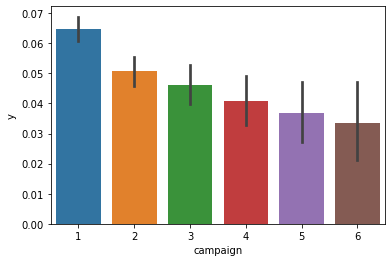

In [59]:
# Relacion con target
bar_plot = sns.barplot(x = data_0['campaign'],
                       y = data_0['y'])

plt.show();

Si consideramos que campaign es el número de contactos realizados durante esta campaña y para este cliente, podemos observar que la probabilidad de que el cliente realice un deposito a plazo fijo disminuye con la cantidad de llamados. 

In [60]:
# Dentro de los casos de exito (realizaron un deposito a plazo fijo) vemos como se distribuyen en funcion de la cantidad de llamados:

data_yes = data_0.loc[data_0.y==1]
print(data_yes.campaign.value_counts(normalize=True))


1    0.529909
2    0.248338
3    0.121450
4    0.053776
5    0.030211
6    0.016314
Name: campaign, dtype: float64


Podemos observar que practicamente el 90% de los casos de exito se confirmaron en 3 o menos llamados. Por lo que podria ser un seria un umbral para definir en que momento conviene dejar de contactar al cliente X por este producto y concentrarse en contactar a otro cliente. Incluso definir que este cliente X quizas pueda estar interesado en otro producto. 

### Variable 'pdays'

In [61]:
data_0['pdays'].value_counts()

Series([], Name: pdays, dtype: int64)

Podemos observar que la variable "pdays" no tiene valores validos en este punto. Esto se debe a que es una variable muy desbalanceada (la mayoria de las observaciones son 999 es decir, no contactados con anterioridad) y que en los pocos casos en los que fueron contactados, esas mismas observaciones representan outliers en alguna otra variable continua. Es por esto que estas observaciones fueron eliminadas al realizar limpieza de outliers. Vale destacar que de todos modos al ser una variable tan desbalanceada, donde practicamente hay un solo valor(999 = "no contactado previamente"), realmente no aporta mucha información al modelo.

### Variable 'previous'

In [62]:
data_0['previous'].value_counts()

0    30360
Name: previous, dtype: int64

Podemos observar que la variable "previous" no tiene valores validos en este punto. Esto se debe a que es una variable muy desbalanceada y que en los pocos casos en los que fueron contactados, esas mismas observaciones representan outliers en alguna otra variable continua. Es por esto que estas observaciones fueron eliminadas al realizar limpieza de outliers. Vale destacar que de todos modos al ser una variable tan desbalanceada, donde practicamente hay un solo valor (0 = no hubo contactos previos antes de esta campaña para este cliente) realmente no aporta mucha información al modelo.

### Variable 'poutcome'

In [63]:
data_0['poutcome'].value_counts()

nonexistent    30360
Name: poutcome, dtype: int64

Variable 'poutcome': Podemos observar que la variable "poutcome" no tiene valores validos en este punto. Esto se debe a que es una variable muy desbalanceada y, del mismo modo que en las variables anteriores, luego de la limpieza de outliers solo quedaron observaciones que no fueron contactadas en campañas previas y por lo tanto no tienen resultados en relacion a esas campañas.

### Variable 'emp.var.rate'

In [64]:
data_0['emp.var.rate'].describe()

count    30360.000000
mean         0.388261
std          1.418314
min         -3.400000
25%         -0.100000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

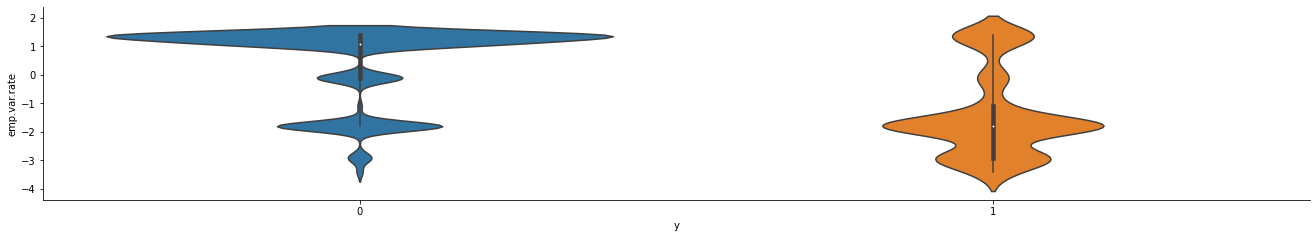

In [65]:
g = sns.catplot(x='y', y='emp.var.rate', data=data_0, kind='violin')
g.fig.set_size_inches(20,3)


A partir de los violin plots, se ve una concentración mayor de casos que no realizan depositos a plazo fijo con valores altos de emp.var.rate, y más casos en los que realizan los depositos a plazo fijo con valores menores de emp.var.rate.

In [66]:
data_0['emp.var.rate_cat'] = pd.qcut(x = data_0['emp.var.rate'], q = 2)

data_0['emp.var.rate_cat'].value_counts()

(-3.401, 1.1]    16792
(1.1, 1.4]       13568
Name: emp.var.rate_cat, dtype: int64

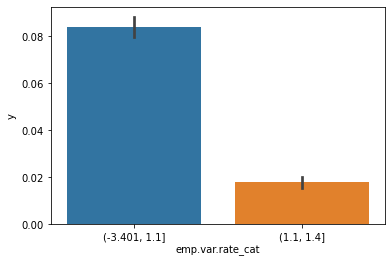

In [67]:
sns.barplot(x='emp.var.rate_cat', y='y', data=data_0);

Agrupando la variable en 2 categorías con cantidades de registros similares, comprobamos que efectivamente, a mayor emp.var.rate, menos casos tenemos en donde se realizan depositos a plazo fijo.

### Variable 'cons.price.idx'

In [68]:
data_0['cons.price.idx'].describe()

count    30360.000000
mean        93.646458
std          0.538624
min         92.201000
25%         93.200000
50%         93.918000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

Vemos datos concentrados entre el 92 y el 95 %, con una media de 93.65% muy poca dispersión.

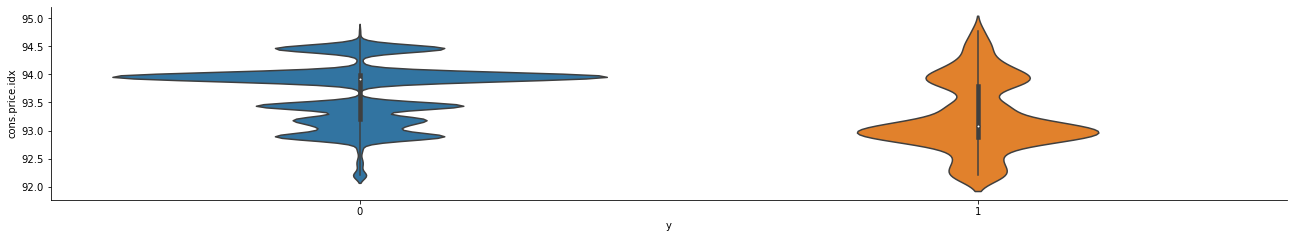

In [69]:
h = sns.catplot(x='y', y='cons.price.idx', data=data_0, kind='violin')
h.fig.set_size_inches(20,3)

In [70]:
data_0['cons.price.idx_cat'] = pd.qcut(x = data_0['cons.price.idx'], q = 2)

data_0['cons.price.idx_cat'].value_counts()

(92.19999999999999, 93.918]    19383
(93.918, 94.767]               10977
Name: cons.price.idx_cat, dtype: int64

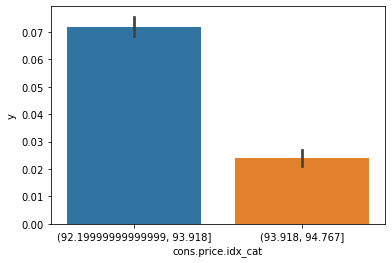

In [71]:
g = sns.barplot(x='cons.price.idx_cat', y='y', data=data_0)
plt.show()

A menores valores de cons.price.idx, mayores probabilidades hay de que se realice el deposito a plazo fijo.

### Variable 'cons.conf.idx'

In [72]:
data_0['cons.conf.idx'].describe()

count    30360.000000
mean       -40.410119
std          4.164977
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -29.800000
Name: cons.conf.idx, dtype: float64

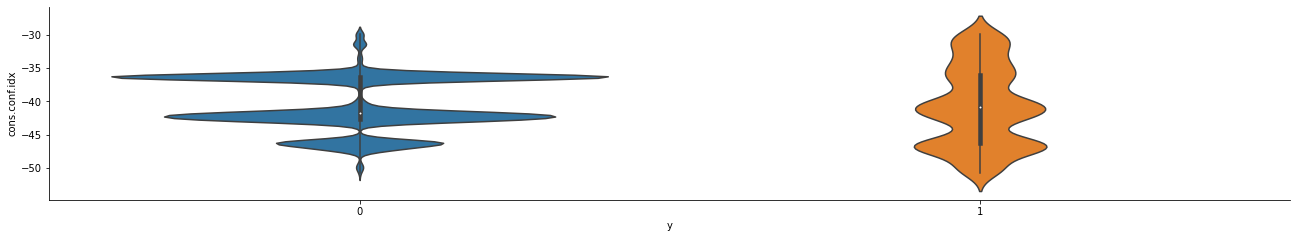

In [73]:
i = sns.catplot(x='y', y='cons.conf.idx', data=data_0, kind='violin')
i.fig.set_size_inches(20,3)

In [74]:
data_0['cons.conf.idx_cat'] = pd.qcut(x = data_0['cons.conf.idx'], q = 4)

data_0['cons.conf.idx_cat'].value_counts()

(-50.800999999999995, -42.7]    10831
(-41.8, -36.4]                   7845
(-42.7, -41.8]                   6250
(-36.4, -29.8]                   5434
Name: cons.conf.idx_cat, dtype: int64

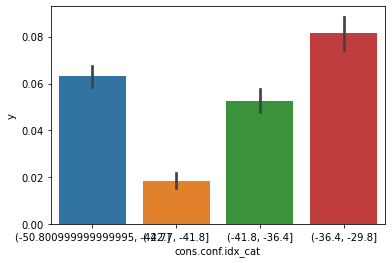

In [75]:
sns.barplot(x='cons.conf.idx_cat', y='y', data=data_0)
plt.show()

Ni el violinplot ni el barplot nos dan una idea clara de si esta variable afecta o no el hecho de que se realice un deposito a plazo fijo.

### Variable 'euribor3m'

In [76]:
data_0['euribor3m'].describe()

count    30360.000000
mean         3.970239
std          1.556323
min          0.634000
25%          4.021000
50%          4.859000
75%          4.962000
max          5.045000
Name: euribor3m, dtype: float64

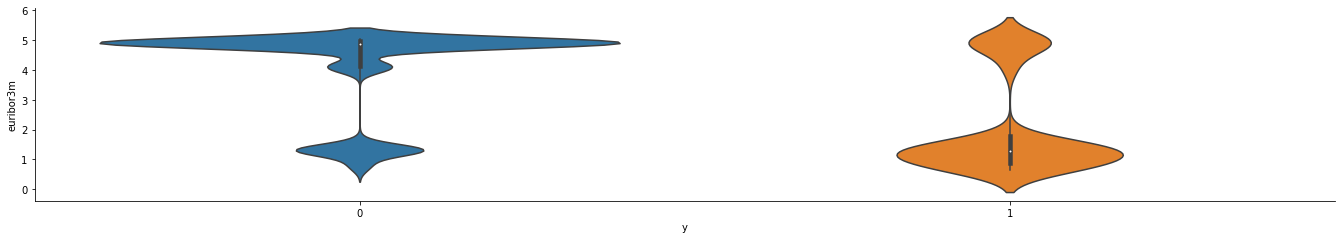

In [77]:
j = sns.catplot(x='y', y='euribor3m', data=data_0, kind='violin')
j.fig.set_size_inches(20,3)

A mayores valores de euriborm3, menores probabilidades hay de que el cliente realice el deposito a plazo fijo; y viceversa.

In [78]:
data_0['euribor3m_cat'] = pd.qcut(x = data_0['euribor3m'], q = 2)

data_0['euribor3m_cat'].value_counts()

(0.633, 4.859]    15635
(4.859, 5.045]    14725
Name: euribor3m_cat, dtype: int64

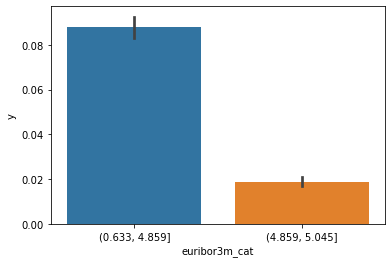

In [79]:
sns.barplot(x='euribor3m_cat', y='y', data=data_0)
plt.show()

### Variable 'nr.employed'

In [80]:
data_0['nr.employed'].describe()

count    30360.000000
mean      5181.932372
std         60.639498
min       4963.600000
25%       5191.000000
50%       5195.800000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

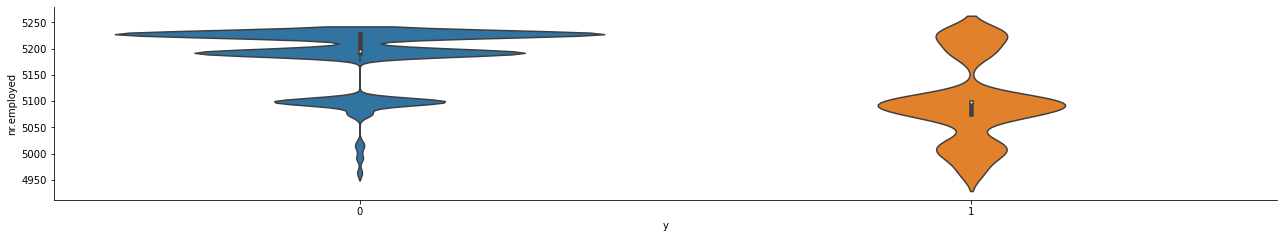

In [81]:
k = sns.catplot(x='y', y='nr.employed', data=data_0, kind='violin')
k.fig.set_size_inches(20,3)

In [82]:
data_0['nr.employed_cat'] = pd.qcut(x = data_0['nr.employed'], q = 2)

data_0['nr.employed_cat'].value_counts()

(4963.599, 5195.8]    16792
(5195.8, 5228.1]      13568
Name: nr.employed_cat, dtype: int64

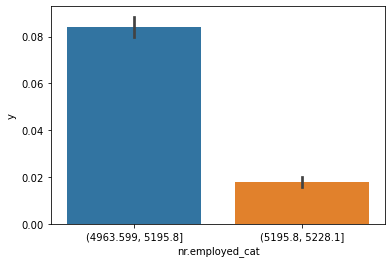

In [83]:
sns.barplot(x='nr.employed_cat', y='y', data=data_0)
plt.show()

## Visualización

In [84]:
custom_palette = sns.color_palette("Paired", 9) #Seteamos paleta de colores para este grafico

sns.set_theme() #seteamos el aspecto general

### Éxito de campaña y Edad

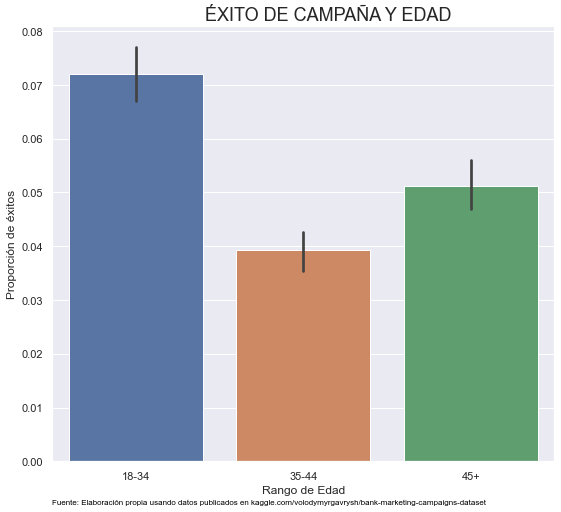

In [85]:
# Relacion edad y la proporcion de exito

fig, ax = plt.subplots(1, 
                      figsize = (9,8), 
                      facecolor = 'white') #Definimos figura y nombre de los ejes

bar_plot = sns.barplot(x = data_0['age_cat'],
                       y = data_0['y'])

plt.xticks(ticks = np.arange(3), 
           labels = ['18-34', '35-44', '45+'])

ax.set(ylabel = "Proporción de éxitos",
       xlabel = "Rango de Edad")

plt.title('ÉXITO DE CAMPAÑA Y EDAD', 
          fontsize = 18, 
          x = .55)

ax.text(0, -0.1,
        'Fuente: Elaboración propia usando datos publicados en kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset',
        verticalalignment = 'bottom',
        horizontalalignment = 'left',
        transform = ax.transAxes,
        color = 'black',
        fontsize = 8)

plt.savefig('exito_por_edad.png', dpi = 300, facecolor = fig.get_facecolor(), bbox_inches = 'tight')

plt.show();

### Éxito de campaña y Educación

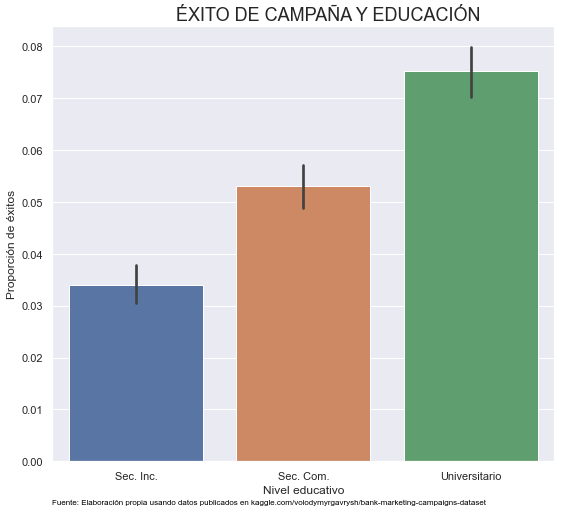

In [86]:
# Relacion educacion y la proporcion de exito

fig, ax = plt.subplots(1, 
                      figsize = (9,8), 
                      facecolor = 'white') #Definimos figura y nombre de los ejes

bar_plot = sns.barplot(x = data_0['edu_cat'],
                       y = data_0['y'])

plt.xticks(ticks = np.arange(3), 
           labels = ['Sec. Inc.', 'Sec. Com.', 'Universitario'])

ax.set(ylabel = "Proporción de éxitos",
       xlabel = "Nivel educativo")

plt.title('ÉXITO DE CAMPAÑA Y EDUCACIÓN', 
          fontsize = 18, 
          x = .55)

ax.text(0, -0.1,
        'Fuente: Elaboración propia usando datos publicados en kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset',
        verticalalignment = 'bottom',
        horizontalalignment = 'left',
        transform = ax.transAxes,
        color = 'black',
        fontsize = 8)

plt.savefig('exito_por_educacion.png', dpi = 300, facecolor = fig.get_facecolor(), bbox_inches = 'tight')

plt.show();

### Éxito de campaña y Ocupación

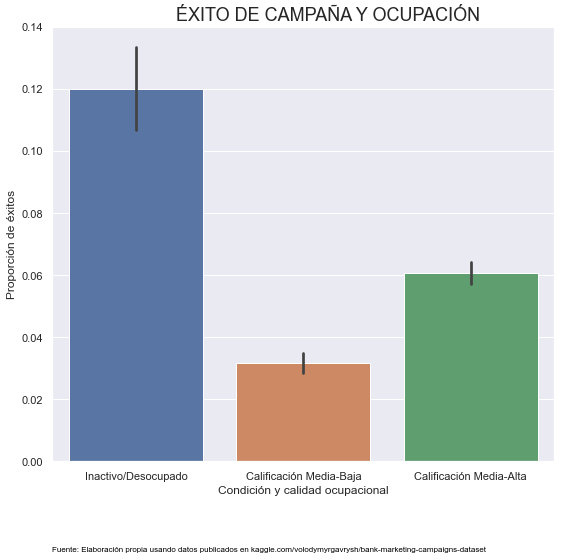

In [87]:
# Relacion tipo de trabajo y la proporcion de exito

fig, ax = plt.subplots(1, 
                      figsize = (9,8), 
                      facecolor = 'white') #Definimos figura y nombre de los ejes

bar_plot = sns.barplot(x = data_0['job_cat'],
                       y = data_0['y'])

#plt.xticks(rotation = 45)

ax.set(ylabel = "Proporción de éxitos",
       xlabel = "Condición y calidad ocupacional")

plt.title('ÉXITO DE CAMPAÑA Y OCUPACIÓN', 
          fontsize = 18, 
          x = .55)

ax.text(0, -0.21,
        'Fuente: Elaboración propia usando datos publicados en kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset',
        verticalalignment = 'bottom',
        horizontalalignment = 'left',
        transform = ax.transAxes,
        color = 'black',
        fontsize = 8)

plt.savefig('exito_por_ocupacion.png', dpi = 300, facecolor=fig.get_facecolor(), bbox_inches='tight')

plt.show();

### Éxito de campaña y Cantidad de contactos con cliente

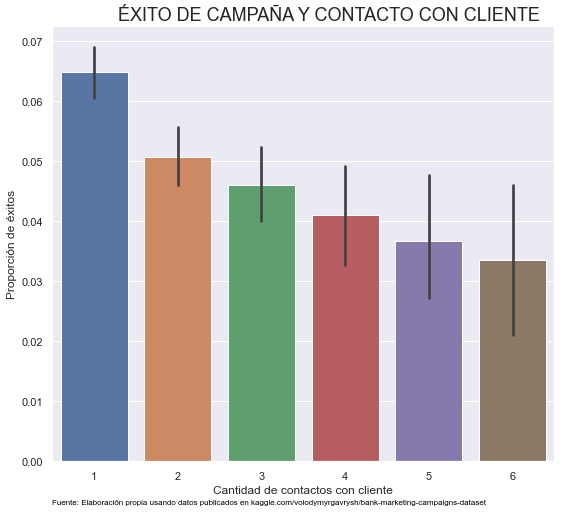

In [88]:
# Relacion numero de contactos y la proporcion de exito

fig, ax = plt.subplots(1, 
                      figsize = (9,8), 
                      facecolor = 'white') #Definimos figura y nombre de los ejes

bar_plot = sns.barplot(x = data_0['campaign'],
                       y = data_0['y'])

ax.set(ylabel = "Proporción de éxitos",
       xlabel = "Cantidad de contactos con cliente")

plt.title('ÉXITO DE CAMPAÑA Y CONTACTO CON CLIENTE', 
          fontsize = 18, 
          x = .55)

ax.text(0, -0.1,
        'Fuente: Elaboración propia usando datos publicados en kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset',
        verticalalignment = 'bottom',
        horizontalalignment = 'left',
        transform = ax.transAxes,
        color = 'black',
        fontsize = 8)

plt.savefig('exito_por_contactos.png', dpi = 300, facecolor = fig.get_facecolor(), bbox_inches = 'tight')

plt.show();

### Éxito de campaña segun Cantidad de contactos con cliente: Edad y Educación

C:\Users\aj\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


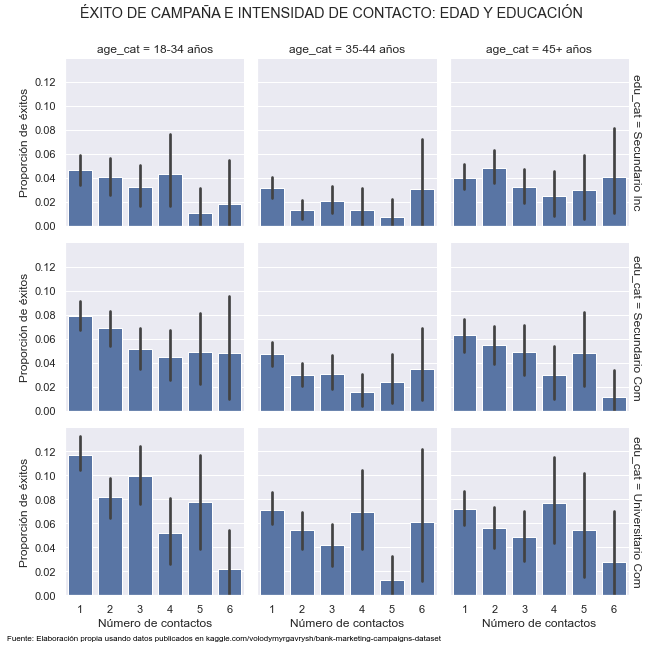

In [89]:
# Relacion entre cantidad de contactos en la campania actual y la proporcion de exito

# Creamos la grilla vacia, donde vamos a segmentar por nivel educativo y por rango de edad

grid = sns.FacetGrid(data_0, 
                     row = "edu_cat",
                     col = "age_cat", 
                     margin_titles = True)

# Graficamos cada uno de los graficos de barras que corresponden a los elementos de la grilla:

grid.map(sns.barplot, 'campaign', "y")

grid.set_axis_labels("Número de contactos", "Proporción de éxitos")

grid.fig.subplots_adjust(top = 0.9)

grid.fig.suptitle('ÉXITO DE CAMPAÑA E INTENSIDAD DE CONTACTO: EDAD Y EDUCACIÓN')
    
grid.fig.text(0, 0,
              'Fuente: Elaboración propia usando datos publicados en kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset',
              verticalalignment = 'bottom',
              horizontalalignment = 'left',
              color = 'black',
              fontsize = 8)

plt.savefig('exito_por_contactos_edadeduc.png', dpi = 300, facecolor=fig.get_facecolor(), bbox_inches='tight')

plt.show();

## Selección y preparación de variables para ejercicios de aprendizaje automático

In [90]:
# Vemos las variables que quedaron

data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30360 entries, 0 to 30359
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 30360 non-null  int64   
 1   job                 30360 non-null  object  
 2   marital             30360 non-null  object  
 3   education           30360 non-null  object  
 4   default             30360 non-null  object  
 5   housing             30360 non-null  int32   
 6   loan                30360 non-null  int32   
 7   contact             30360 non-null  int32   
 8   month               30360 non-null  int64   
 9   day_of_week         30360 non-null  int64   
 10  duration            30360 non-null  int64   
 11  campaign            30360 non-null  int64   
 12  pdays               0 non-null      float64 
 13  previous            30360 non-null  int64   
 14  poutcome            30360 non-null  object  
 15  emp.var.rate        30360 non-null  

In [91]:
# Transformamos las categoricas en dummies

variables_a_dummies = ['age_cat', 'job_cat', 'edu_cat', 'day_of_week']

data_0 = pd.get_dummies(data_0,
                        columns = variables_a_dummies,
                        drop_first = True)


In [92]:
# Vemos las columnas post aplicacion de get_dummies

data_0.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'married', 'month_cat', 'duration_cat',
       'emp.var.rate_cat', 'cons.price.idx_cat', 'cons.conf.idx_cat',
       'euribor3m_cat', 'nr.employed_cat', 'age_cat_35-44 años',
       'age_cat_45+ años', 'job_cat_Calificación Media-Baja',
       'job_cat_Calificación Media-Alta', 'edu_cat_Secundario Com',
       'edu_cat_Universitario Com', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5'],
      dtype='object')

In [93]:
# Armamos la base para los ejercicios de entrenamiento

variables_a_dropear = ['age', 'job', 'marital', 'education', 'default', 
                       'month', 'duration', 'duration_cat', 'pdays', 'previous',
                       'poutcome', 'emp.var.rate_cat', 'cons.price.idx_cat', 'cons.conf.idx_cat',
                       'euribor3m_cat', 'nr.employed_cat']

In [94]:
data_0.drop(variables_a_dropear, axis = 1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30360 entries, 0 to 30359
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   housing                          30360 non-null  int32  
 1   loan                             30360 non-null  int32  
 2   contact                          30360 non-null  int32  
 3   campaign                         30360 non-null  int64  
 4   emp.var.rate                     30360 non-null  float64
 5   cons.price.idx                   30360 non-null  float64
 6   cons.conf.idx                    30360 non-null  float64
 7   euribor3m                        30360 non-null  float64
 8   nr.employed                      30360 non-null  float64
 9   y                                30360 non-null  int32  
 10  married                          30360 non-null  int64  
 11  month_cat                        30360 non-null  int64  
 12  age_cat_35-44 años

In [95]:
data_0.drop(variables_a_dropear, axis = 1).describe()

,housing,loan,contact,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,age_cat_35-44 años,age_cat_45+ años,job_cat_Calificación Media-Baja,job_cat_Calificación Media-Alta,edu_cat_Secundario Com,edu_cat_Universitario Com,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5
count,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,...,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000
mean,0.544598,0.151482,0.413011,2.081555,0.388261,93.646458,-40.410119,3.970239,5181.932372,0.054513,...,0.337747,0.307609,0.359552,0.569796,0.357411,0.333037,0.199045,0.197760,0.204974,0.186397
std,0.498015,0.358524,0.492383,1.302700,1.418314,0.538624,4.164977,1.556323,60.639498,0.227030,...,0.472950,0.461511,0.479877,0.495113,0.479245,0.471307,0.399288,0.398317,0.403689,0.389433
min,0.000000,0.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,-0.100000,93.200000,-42.700000,4.021000,5191.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,2.000000,1.100000,93.918000,-41.800000,4.859000,5195.800000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,3.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,6.000000,1.400000,94.767000,-29.800000,5.045000,5228.100000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
# Descartamos las variables que no vamos a usar para el ejercicio de entrenamiento

base_entrenamiento = data_0.drop(variables_a_dropear, axis = 1)

In [97]:
# Exportamos la base para entrenamiento

#base_entrenamiento.to_csv('base_entrenamiento.csv', index = False)